# Power Production Project

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
df = pd.read_csv (r'powerproduction.csv')
print (df)

      speed  power
0     0.000    0.0
1     0.125    0.0
2     0.150    0.0
3     0.225    0.0
4     0.275    0.0
..      ...    ...
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0

[500 rows x 2 columns]


In [20]:
df.dtypes

speed    float64
power    float64
dtype: object

In [21]:
df.isnull().values.any()

False

In [22]:
#df.drop(df.columns[df.apply(lambda col: col.isnull().sum() > 3)], axis=1)
df_remove_power_Zero =  df[df.power != 0]

In [23]:
print(df_remove_power_Zero)

      speed    power
5     0.325    4.331
6     0.400    5.186
7     0.450    3.826
8     0.501    1.048
9     0.526    5.553
..      ...      ...
485  24.249  103.700
486  24.299   93.694
487  24.349   93.078
488  24.374   98.223
489  24.399   95.117

[451 rows x 2 columns]


In [24]:
df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [25]:
df_remove_power_Zero.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


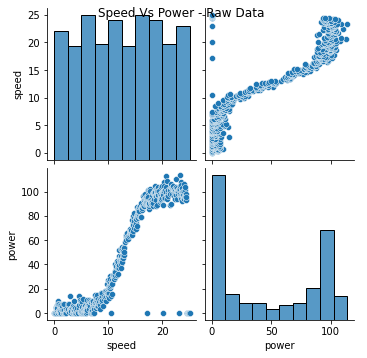

In [26]:
sns.pairplot(df).add_legend().fig.suptitle('Speed Vs Power - Raw Data')
plt.show()

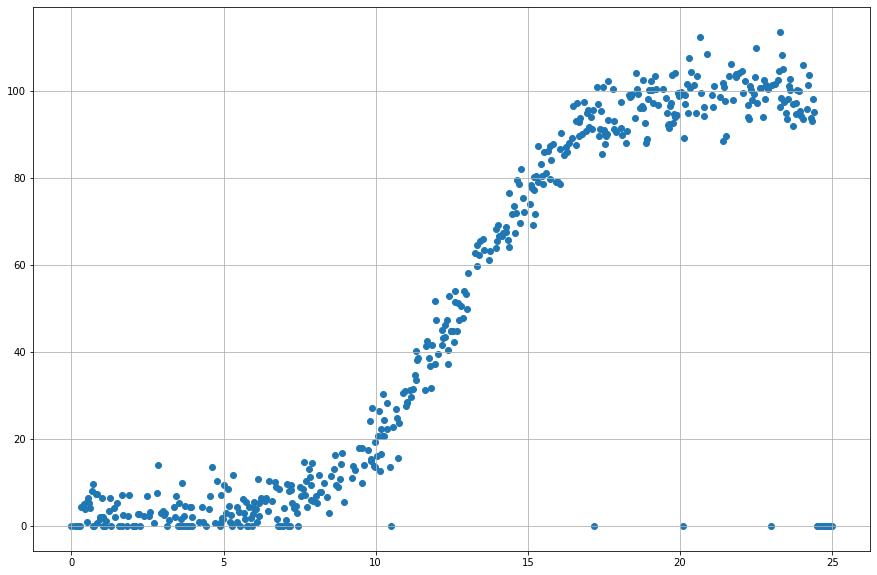

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(df['speed'],df['power'])
plt.grid()

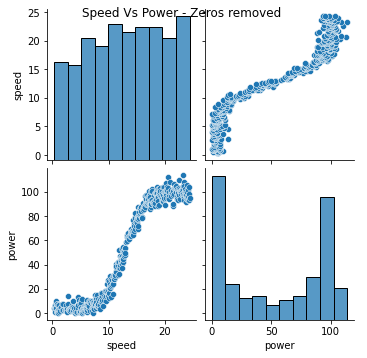

In [28]:
sns.pairplot(df_remove_power_Zero).add_legend().fig.suptitle('Speed Vs Power - Zeros removed')
plt.show()

In [29]:
import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
X = df_remove_power_Zero.values[:,0]
Y = df_remove_power_Zero.values[:,1]

In [31]:
X_reshape =  X.reshape(-1, 1)
Y_reshape = Y.reshape(-1,1)

In [32]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_reshape, Y, test_size=0.20, random_state=7)

In [33]:
lin_reg_model = lin.LinearRegression().fit(X_train,Y_train)

In [34]:
r = lin_reg_model.score(X_validation, Y_validation)

In [35]:
print(r)

0.9038134283916828


In [36]:
Y_pred = lin_reg_model.predict(X_validation)
#print(Y_pred[2])
for i in range(0,len(Y_pred)):
    a = X_validation[i]
    b = round(Y_pred[i],3)
    c = round(Y_validation[i],3)
    print("Wind Speed: "+ str(a) +"\nPREDICTED VALUE:" + str(b) + ", ACTUAL VALUE:" +str(c) + "\nPERCENTAGE DIFFERENCE: "+ str(round((((b/c)-1)*100),3)) +"%\n")

Wind Speed: [10.561]
PREDICTED VALUE:39.465, ACTUAL VALUE:22.758
PERCENTAGE DIFFERENCE: 73.412%

Wind Speed: [22.723]
PREDICTED VALUE:108.234, ACTUAL VALUE:93.964
PERCENTAGE DIFFERENCE: 15.187%

Wind Speed: [24.349]
PREDICTED VALUE:117.428, ACTUAL VALUE:93.078
PERCENTAGE DIFFERENCE: 26.161%

Wind Speed: [22.523]
PREDICTED VALUE:107.103, ACTUAL VALUE:97.256
PERCENTAGE DIFFERENCE: 10.125%

Wind Speed: [9.309]
PREDICTED VALUE:32.386, ACTUAL VALUE:12.881
PERCENTAGE DIFFERENCE: 151.425%

Wind Speed: [20.17]
PREDICTED VALUE:93.798, ACTUAL VALUE:96.963
PERCENTAGE DIFFERENCE: -3.264%

Wind Speed: [5.681]
PREDICTED VALUE:11.872, ACTUAL VALUE:3.036
PERCENTAGE DIFFERENCE: 291.041%

Wind Speed: [10.11]
PREDICTED VALUE:36.915, ACTUAL VALUE:26.427
PERCENTAGE DIFFERENCE: 39.687%

Wind Speed: [20.571]
PREDICTED VALUE:96.066, ACTUAL VALUE:103.405
PERCENTAGE DIFFERENCE: -7.097%

Wind Speed: [14.364]
PREDICTED VALUE:60.969, ACTUAL VALUE:76.551
PERCENTAGE DIFFERENCE: -20.355%

Wind Speed: [23.248]
PREDICT

In [37]:
all_lin_reg = lin.LinearRegression().fit(X_reshape,Y_reshape)

In [38]:
all_lin_reg.predict(np.array([[15]]))[0]

array([64.44473211])

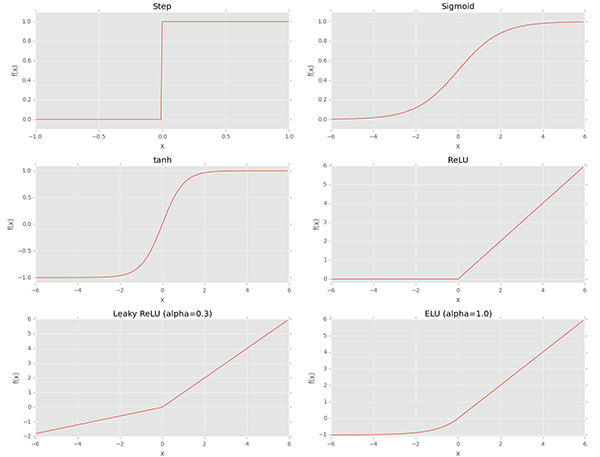

Source for the image: https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

Sources:
    https://www.duo.uio.no/bitstream/handle/10852/57735/Master_Thesis_Finn_Erik_20170525_FINAL.pdf?isAllowed=y&sequence=7

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn.linear_model as lin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

import tensorflow as tf
from tensorflow import keras

In [69]:
df = pd.read_csv (r'powerproduction.csv')

In [70]:
df_remove_power_Zero =  df[df.power != 0]

In [71]:
X = df_remove_power_Zero.values[:,0]
Y = df_remove_power_Zero.values[:,1]

In [72]:
X_reshape =  X.reshape(-1, 1)
Y_reshape = Y.reshape(-1,1)

In [73]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X_reshape, Y, test_size=0.10, random_state=7)

Linear Regression

In [74]:
lin_reg_model = lin.LinearRegression().fit(X_train,Y_train)
r = lin_reg_model.score(X_validation, Y_validation)
print(r)

0.8914072142194885


In [75]:
all_lin_reg = lin.LinearRegression().fit(X_reshape,Y_reshape)
all_lin_reg.predict(np.array([[15]]))[0]

array([64.44473211])

k Nearest Neighbours

In [76]:
knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, Y_train)
k = knn.score(X_validation, Y_validation)
print(k)

0.9888387901081984


In [77]:
all_knn = KNeighborsRegressor(n_neighbors=5).fit(X_reshape,Y_reshape)
all_knn.predict(np.array([[15]]))[0]

array([75.5042])

In [108]:
#https://keras.io/guides/sequential_model/
#A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

model = keras.models.Sequential()
model.add(keras.layers.Dense(30, input_shape=(1,), activation="tanh"))
model.add(keras.layers.Dense(1, input_shape=(1,), activation="linear"))
#model.add(keras.layers.Dense(1, output_shape=(1,)))
model.compile('adam',loss='mean_squared_error')

In [109]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                60        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 31        
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.fit(X_train, Y_train, epochs=500)

Epoch 1/500
13/13 [==============================] - 0s 1ms/step - loss: 4239.9798
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 4482.0204
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 3859.7329
Epoch 4/500
13/13 [==============================] - 0s 1ms/step - loss: 3995.8161
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 3889.1895
Epoch 6/500
13/13 [==============================] - 0s 1ms/step - loss: 4102.6188
Epoch 7/500
13/13 [==============================] - 0s 1ms/step - loss: 4063.5751
Epoch 8/500
13/13 [==============================] - 0s 1ms/step - loss: 3592.8755
Epoch 9/500
13/13 [==============================] - 0s 1ms/step - loss: 3994.8871
Epoch 10/500
13/13 [==============================] - 0s 1ms/step - loss: 3767.1343
Epoch 11/500
13/13 [==============================] - 0s 1ms/step - loss: 3570.6781
Epoch 12/500
13/13 [==============================] - 0s 1ms/step - loss: 3496.9184
E

13/13 [==============================] - 0s 1ms/step - loss: 1642.6698
Epoch 99/500
13/13 [==============================] - 0s 2ms/step - loss: 1412.5331
Epoch 100/500
13/13 [==============================] - 0s 1ms/step - loss: 1484.7454
Epoch 101/500
13/13 [==============================] - 0s 2ms/step - loss: 1526.0816
Epoch 102/500
13/13 [==============================] - 0s 1ms/step - loss: 1527.3454
Epoch 103/500
13/13 [==============================] - 0s 2ms/step - loss: 1533.6377
Epoch 104/500
13/13 [==============================] - 0s 1ms/step - loss: 1516.4538
Epoch 105/500
13/13 [==============================] - 0s 1ms/step - loss: 1407.5090
Epoch 106/500
13/13 [==============================] - 0s 1ms/step - loss: 1501.8767
Epoch 107/500
13/13 [==============================] - 0s 1ms/step - loss: 1469.9782
Epoch 108/500
13/13 [==============================] - 0s 1ms/step - loss: 1416.1053
Epoch 109/500
13/13 [==============================] - 0s 1ms/step - loss: 1327.

13/13 [==============================] - 0s 1ms/step - loss: 520.9057
Epoch 196/500
13/13 [==============================] - 0s 1ms/step - loss: 513.9437
Epoch 197/500
13/13 [==============================] - 0s 1ms/step - loss: 525.7789
Epoch 198/500
13/13 [==============================] - 0s 2ms/step - loss: 482.8927
Epoch 199/500
13/13 [==============================] - 0s 1ms/step - loss: 470.9570
Epoch 200/500
13/13 [==============================] - 0s 1ms/step - loss: 447.3748
Epoch 201/500
13/13 [==============================] - 0s 1ms/step - loss: 508.3781
Epoch 202/500
13/13 [==============================] - 0s 1ms/step - loss: 483.1426
Epoch 203/500
13/13 [==============================] - 0s 1ms/step - loss: 457.6772
Epoch 204/500
13/13 [==============================] - 0s 1ms/step - loss: 473.4867
Epoch 205/500
13/13 [==============================] - 0s 1ms/step - loss: 430.9420
Epoch 206/500
13/13 [==============================] - 0s 1ms/step - loss: 438.4666
Epoch 

Epoch 292/500
13/13 [==============================] - 0s 1ms/step - loss: 119.1276
Epoch 293/500
13/13 [==============================] - 0s 1ms/step - loss: 119.6051
Epoch 294/500
13/13 [==============================] - 0s 1ms/step - loss: 112.3021
Epoch 295/500
13/13 [==============================] - 0s 1ms/step - loss: 112.8498
Epoch 296/500
13/13 [==============================] - 0s 1ms/step - loss: 119.4166
Epoch 297/500
13/13 [==============================] - 0s 1ms/step - loss: 94.5476
Epoch 298/500
13/13 [==============================] - 0s 1ms/step - loss: 110.8153
Epoch 299/500
13/13 [==============================] - 0s 1ms/step - loss: 110.3908
Epoch 300/500
13/13 [==============================] - 0s 1ms/step - loss: 100.8546
Epoch 301/500
13/13 [==============================] - 0s 1ms/step - loss: 92.3785
Epoch 302/500
13/13 [==============================] - 0s 1ms/step - loss: 99.4432
Epoch 303/500
13/13 [==============================] - 0s 1ms/step - loss: 112.

13/13 [==============================] - 0s 1ms/step - loss: 28.0191
Epoch 391/500
13/13 [==============================] - 0s 1ms/step - loss: 25.9991
Epoch 392/500
13/13 [==============================] - 0s 1ms/step - loss: 24.8497
Epoch 393/500
13/13 [==============================] - 0s 2ms/step - loss: 28.9271
Epoch 394/500
13/13 [==============================] - 0s 1ms/step - loss: 23.7506
Epoch 395/500
13/13 [==============================] - 0s 1ms/step - loss: 25.0506
Epoch 396/500
13/13 [==============================] - 0s 1ms/step - loss: 25.7065
Epoch 397/500
13/13 [==============================] - 0s 1ms/step - loss: 22.7482
Epoch 398/500
13/13 [==============================] - 0s 1ms/step - loss: 24.8870
Epoch 399/500
13/13 [==============================] - 0s 1ms/step - loss: 24.7160
Epoch 400/500
13/13 [==============================] - 0s 1ms/step - loss: 27.7057
Epoch 401/500
13/13 [==============================] - 0s 1ms/step - loss: 28.5949
Epoch 402/500
13/1

13/13 [==============================] - 0s 1ms/step - loss: 17.7215
Epoch 489/500
13/13 [==============================] - 0s 2ms/step - loss: 17.1683
Epoch 490/500
13/13 [==============================] - 0s 1ms/step - loss: 16.6118
Epoch 491/500
13/13 [==============================] - 0s 2ms/step - loss: 18.0937
Epoch 492/500
13/13 [==============================] - 0s 1ms/step - loss: 16.9977
Epoch 493/500
13/13 [==============================] - 0s 1ms/step - loss: 17.0939
Epoch 494/500
13/13 [==============================] - 0s 1ms/step - loss: 18.5794
Epoch 495/500
13/13 [==============================] - 0s 1ms/step - loss: 18.1493
Epoch 496/500
13/13 [==============================] - 0s 1ms/step - loss: 16.3294
Epoch 497/500
13/13 [==============================] - 0s 1ms/step - loss: 19.7839
Epoch 498/500
13/13 [==============================] - 0s 1ms/step - loss: 17.5487
Epoch 499/500
13/13 [==============================] - 0s 1ms/step - loss: 18.1123
Epoch 500/500
13/1

In [85]:
X_train.size

405

In [86]:
Y_train.size

405

In [87]:
X_validation.size

46

In [88]:
Y_validation.size

46

In [91]:
pred = model.predict(X_validation)
pred.size

1380

In [111]:
model.predict([6.5]).size

1

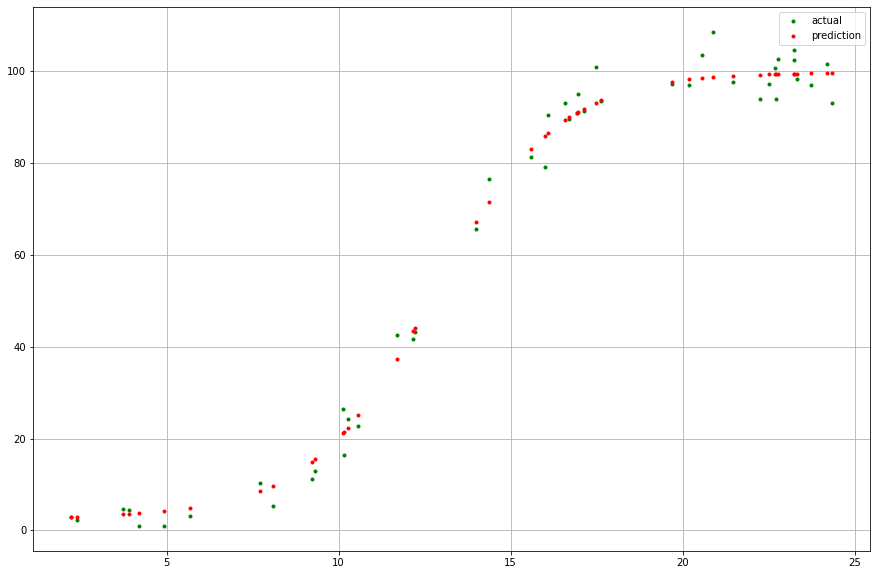

In [112]:
plt.figure(figsize=(15,10))
plt.plot(X_validation,Y_validation,'g.' , label='actual')
plt.plot(X_validation,model.predict(X_validation), 'r.', label='prediction')
plt.grid()
plt.legend()

In [114]:
model.save("powerpred.h5")

1. https://medium.com/@luwei.io/logistic-regression-with-keras-d75d640d175e
2. https://aigeekprogrammer.com/binary-classification-using-logistic-regression-and-keras/
3. https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781789132212/1/ch01lvl1sec15/logistic-regression-with-keras
4. https://towardsdatascience.com/3-ways-to-create-a-machine-learning-model-with-keras-and-tensorflow-2-0-de09323af4d3
5. https://tomroth.com.au/keras/
6. https://curiousily.com/posts/deploy-keras-deep-learning-project-to-production-with-flask/
7. https://towardsdatascience.com/deploying-keras-deep-learning-models-with-flask-5da4181436a2
8. https://medium.com/datadriveninvestor/flask-api-for-keras-87c06da174e8